In [38]:
import numpy as np
import pandas as pd
from math import ceil
import psycopg2
from time import time
import psycopg2.extras
from copy import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

sqluser = 'postgres'
dbname = 'test'
schema_name = 'mimiciii'
password = 'postgres'
db_schema = 'set search_path to ' + schema_name + ';'
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password, host='/var/run/postgresql/')
cursor = con.cursor()
con.commit()



In [ ]:
df = pd.read_sql('select * from timetable;',con)

context = pd.read_sql('select * from context;',con)
context.shape

In [ ]:
id2list = df.itemid2.unique()
id2list = id2list[~np.isnan(id2list)].tolist()
id2list = [int(i) for i in id2list]

In [ ]:
for i in id2list:
    string = '''select icustay_id, avg (value) average_{0}, min(value) minimum_{0}, max(value) maximum_{0}
        , count(*) cnt_{0}
        from timetable
        where itemid2 = '{0}'
        group by icustay_id 
        order by icustay_id;

        '''.format(i)
    tempdf = pd.read_sql(string,con)
    context = context.merge(tempdf,how="left" ,on='icustay_id')
    print ("{} completed".format(i))

In [ ]:
cplus = pd.read_sql("select * from context;", con)

In [ ]:
cplus = cplus.drop('diagnosis', axis=1)
objectmap = cplus.select_dtypes(include="object").columns.tolist()
objectmap

In [ ]:
cplus = pd.get_dummies(cplus, columns=objectmap)      
cplus.shape

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
import psycopg2
from time import time
import psycopg2.extras
from copy import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

sqluser = 'postgres'
dbname = 'mimic'
schema_name = 'mimiciii'
password = 'postgres'
db_schema = 'set search_path to ' + schema_name + ';'
con = psycopg2.connect(dbname=dbname, user=sqluser, password=password, host='/var/run/postgresql/')
cursor = con.cursor()
con.commit()



In [ ]:
df = pd.read_sql('select * from diagnoses_icd limit 1000;',con)

In [ ]:
df = pd.get_dummies(df,columns=['icd9_code'])
df = pd.pivot_table(df,index= 'hadm_id',values=[col for col in df if col.startswith('icd9')],aggfunc=np.sum)

In [ ]:
df.drop(axis=)

In [ ]:
abc = pd.read_csv('/home/ubuntu/analyze_shallow/output/contextplus.csv')
abc.shape

In [ ]:
abc.dtypes

In [ ]:
df = pd.read_sql("select * from context", con)
df.dtypes

In [ ]:
dytpetime = df.select_dtypes(include="datetime").columns.tolist()
dytpetime

In [ ]:
# admittime - dob as age_at_admission
# inttime - admittime as adm_to_icu
# outtime - intime as icu_los
# dischtime - admittime as hosp_los
# dod - dob as age_at_death


In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE

In [4]:
predata = pd.read_csv('/home/ubuntu/analyze_shallow/output/contextplus.csv')

In [24]:
imp = Imputer(missing_values='NaN', strategy='median', axis = 0)
imp.fit_transform(predata)
postdata = pd.DataFrame(data=imp.transform(predata), columns = predata.columns)

In [25]:
postdata = postdata.drop(columns=['index','icustay_id','hadm_id','subject_id','first_wardid','last_wardid'])

In [29]:
minmax = Normalizer()
minmax.fit_transform(postdata)
postdata = pd.DataFrame(data=minmax.transform(predata), columns = predata.columns)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [31]:
X = postdata.values

In [42]:
X_embed = TSNE(n_components=3).fit_transform(X)

In [43]:
tsneresults = pd.DataFrame(X_embed, columns = ["x","y","z"])

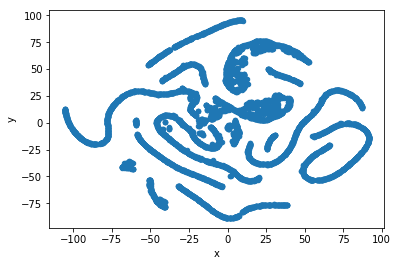

In [41]:
tsneresults.plot.scatter(x="x",y="y")

In [51]:
type(X_embed)

numpy.ndarray

In [73]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.